In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.special import expit
import skimage.io
from ising import IsingDeNoise

In [25]:
image = skimage.io.imread("../image_small.png")
image = (image[:,:,0].astype(np.int64) * 2) - 1
image[image >= 1] = 1
image[image < 1] = -1

In [26]:
q = 0.9
noise = np.random.random(size = image.size).reshape(image.shape) > q
noisy = np.array(image)
noisy[noise] = -noisy[noise]

In [ ]:
annealing_schemas = ['linear', 'exponential', 'power', 'cosine']
cleaned_images = []

for annealing in annealing_schemas:
    cleaned_image = IsingDeNoise(noisy, use_annealing=True, q=0.9, beta_schedule=annealing)
    cleaned_image[cleaned_image >= 0] = 1
    cleaned_image[cleaned_image < 0] = -1
    cleaned_images.append(cleaned_image)

Burn-in z planem rozgrzewania (linear): β = 0.10 → 2.00
Próbkowanie z stałą temperaturą
Burn-in z planem rozgrzewania (exponential): β = 0.10 → 2.00
Próbkowanie z stałą temperaturą
Burn-in z planem rozgrzewania (power): β = 0.10 → 2.00
Próbkowanie z stałą temperaturą
Burn-in z planem rozgrzewania (cosine): β = 0.10 → 2.00
Próbkowanie z stałą temperaturą


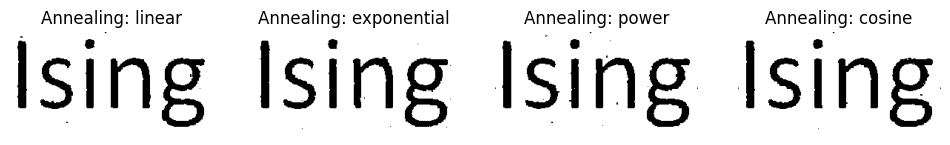

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(12, 8))
for ax, cleaned_image, annealing in zip(axes, cleaned_images, annealing_schemas):
    ax.imshow(cleaned_image, cmap=cm.gray)
    ax.set_title(f"Annealing: {annealing}")
    ax.axis('off')

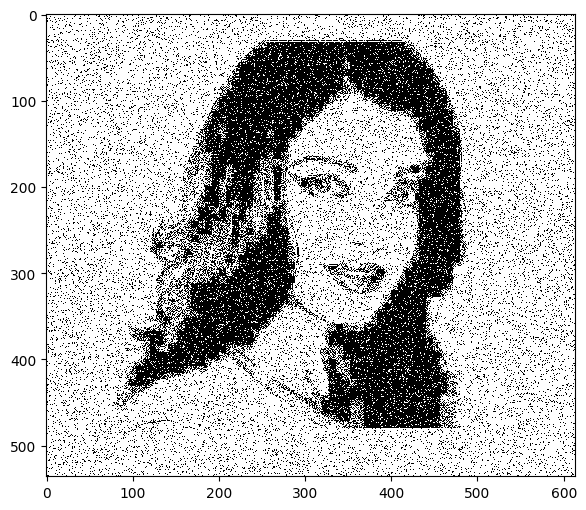

In [42]:
woman_image = skimage.io.imread("../binaryImg.jpg")

woman_image = (woman_image[:,:,0].astype(np.int64) * 2) - 1 # Black and white so just grab one RGB channel
woman_image[woman_image >= 1] = 1
woman_image[woman_image < 1] = -1

q = 0.9
noise = np.random.random(size = woman_image.size).reshape(woman_image.shape) > q
woman_noisy = np.array(woman_image)
woman_noisy[noise] = -woman_noisy[noise]
fig, axes = plt.subplots(figsize=(10,6))
axes.imshow(woman_noisy, cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)
plt.show()

In [ ]:
annealing_schemas = ['linear', 'exponential', 'power', 'cosine']
cleaned_images_woman = []

for annealing in annealing_schemas:
    cleaned_image = IsingDeNoise(woman_noisy, use_annealing=True, q=0.9, beta_schedule=annealing)
    cleaned_image[cleaned_image >= 0] = 1
    cleaned_image[cleaned_image < 0] = -1
    cleaned_images_woman.append(cleaned_image)

Burn-in z planem rozgrzewania (linear): β = 0.10 → 2.00
Próbkowanie z stałą temperaturą
Burn-in z planem rozgrzewania (exponential): β = 0.10 → 2.00
Próbkowanie z stałą temperaturą
Burn-in z planem rozgrzewania (power): β = 0.10 → 2.00
Próbkowanie z stałą temperaturą
Burn-in z planem rozgrzewania (cosine): β = 0.10 → 2.00
Próbkowanie z stałą temperaturą


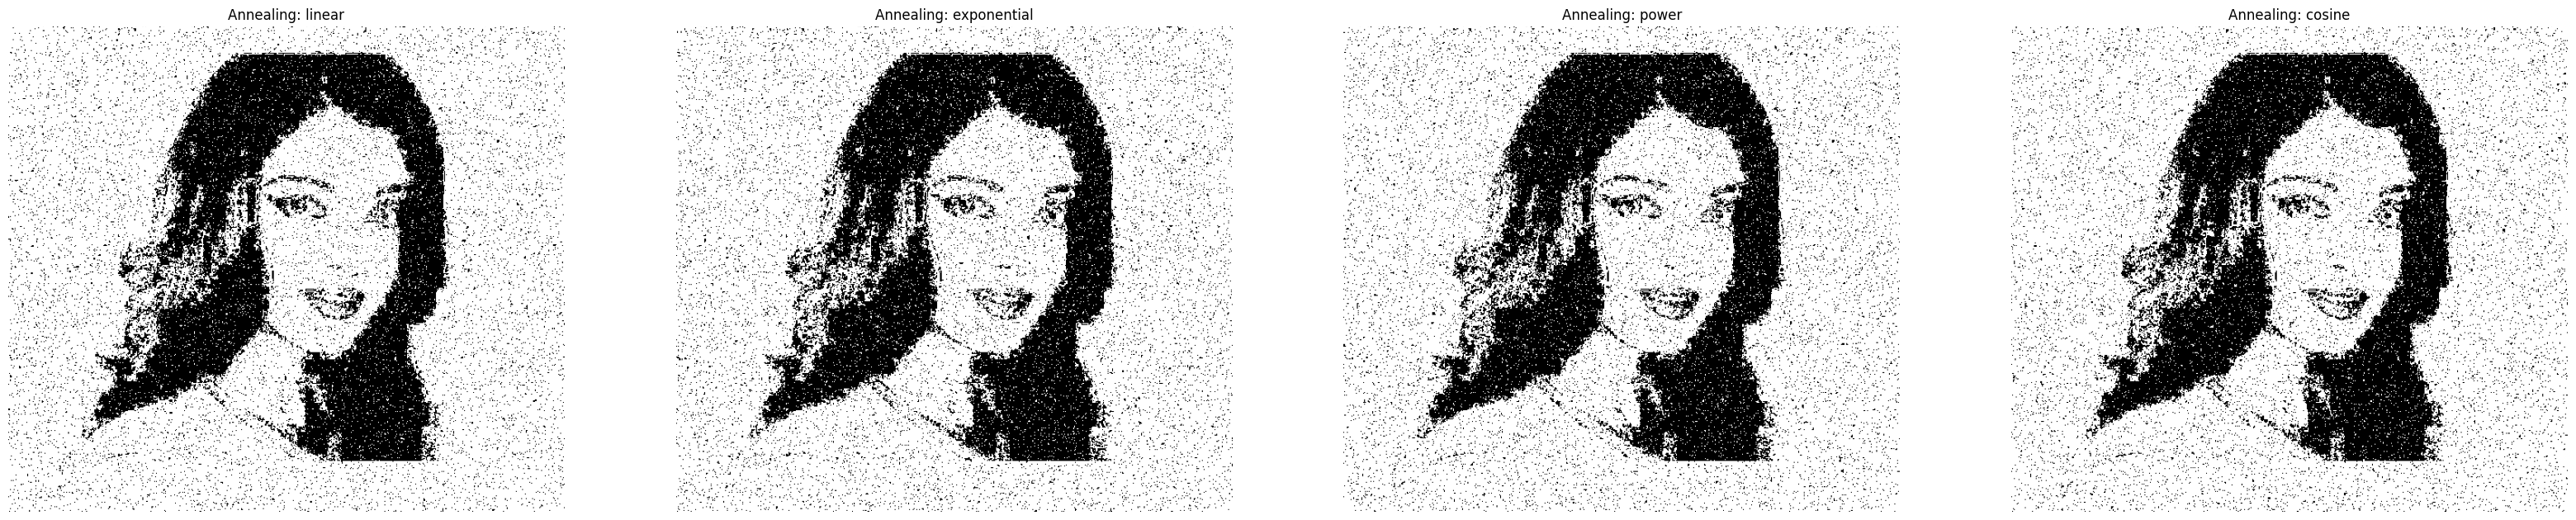

In [60]:
fig, axes = plt.subplots(1, 4, figsize=(40, 15))
for ax, cleaned_image, annealing in zip(axes, cleaned_images_woman, annealing_schemas):
    ax.imshow(cleaned_image, cmap=cm.gray)
    ax.set_title(f"Annealing: {annealing}")
    ax.axis('off')